# 🚪 Attrition in an Organization | Why Do Employees Quit?

Employees are the backbone of any organization. Their performance and satisfaction significantly influence overall productivity and profitability. **Employee attrition**—when individuals voluntarily or involuntarily leave a company—can lead to several business challenges:

- 💸 High cost and time associated with hiring and training new employees  
- 🧠 Loss of institutional knowledge and experienced talent  
- 📉 Decrease in overall productivity  
- 📊 Negative impact on profit margins  

As data-driven analysts, our first step before diving into the dataset is to **frame the problem clearly** and align it with strategic business goals.

---

## 🎯 Business Questions to Explore

To understand and address the attrition issue effectively, we must brainstorm around the following critical questions:

1. **What factors contribute most significantly to employee attrition?**  
2. **Are certain departments or job roles more prone to attrition than others?**  
3. **What demographic or behavioral patterns can we observe among employees who leave?**  
4. **What actionable measures can the company take to retain employees?**  
5. **What is the potential business value of an attrition prediction model?**  
6. **Can predictive insights reduce the financial and productivity costs associated with attrition?**  
7. **How can visualization and dashboards assist HR and leadership in monitoring attrition trends?**

---

## 📌 Project Objectives

We will break down the project into two primary phases for clarity and execution efficiency:

### 🔍 Phase 1: Exploratory Data Analysis (EDA)

- Understand data distributions and outliers  
- Identify key patterns and correlations related to attrition  
- Segment and profile employees based on attrition risk  
- Build visual insights using tools like **Tableau**  
- Deliver business summaries with actionable insights  

### 🤖 Phase 2: Predictive Modeling

- Prepare data for machine learning (encoding, balancing, scaling)  
- Build and compare multiple classification models (e.g., Logistic Regression, Random Forest, XGBoost)  
- Evaluate performance using precision, recall, F1 score, ROC AUC, etc.  
- Interpret feature importance and explainability (e.g., SHAP values)  
- Suggest deployment or HR dashboard integration strategies  

---

In [2]:
import hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [8]:
import os
# Set the path depending on whether you're on Kaggle or running locally
if os.path.exists('/kaggle/input'):
    # Kaggle environment
    data_path = "/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"
else:
    data_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv' 
# Load the dataset
df = pd.read_csv(data_path)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

# PHASE 1 - Exploratory Data Analysis #


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count   1470.00          1470.00        1470.00      1470.00   
mean       2.06             2.73        6502.93     14313.10   
std        1.11             1.10        4707.96      7117.79   
min        1.00             1.00        1009.00      2094.00   
25%        1.00             2.00        2911.00      8047.00   
50%        2.00             3.00        4919.00     14235.50   
75%        3.00             4.00        8379.00     20461.50   
max        5.00             4.00       19999.00     26999.00   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count             1470.00            1470.00            1470.00   
mean                 2.69              15.21               3.15   
std                  2.50               3.66               0.36   
min                  0.00              11.00               3.00   
25%                  1.00              12.00               3.00   
50%                  2.00              14.00               3.00   
75%                  4.00              18.00               3.00   
max                  9.00              25.00               4.00   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                   1470.00        1470.00           1470.00   
mean                       2.71          80.00              0.79   
std                        1.08           0.00              0.85   
min                        1.00          80.00              0.00   
25%                        2.00          80.00              0.00   
50%                        3.00          80.00              1.00   
75%                        4.00          80.00              1.00   
max                        4.00          80.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count            1470.00                1470.00          1470.00   
mean               11.28                   2.80             2.76   
std                 7.78                   1.29             0.71   
min                 0.00                   0.00             1.00   
25%                 6.00                   2.00             2.00   
50%                10.00                   3.00             3.00   
75%                15.00                   3.00             3.00   
max                40.00                   6.00             4.00   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00             1470.00                  1470.00   
mean             7.01                4.23                     2.19   
std              6.13                3.62

In [11]:
# Drop unnecessary columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)


## Categorical Features ##

In [12]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [13]:
len(object_col)

7

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

## Numerical Features ##

In [15]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [16]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


## Data Visualisation ##

In [17]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [18]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [19]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [20]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [21]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [22]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [23]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [24]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [25]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [36]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [28]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

In [29]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [37]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [31]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [32]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

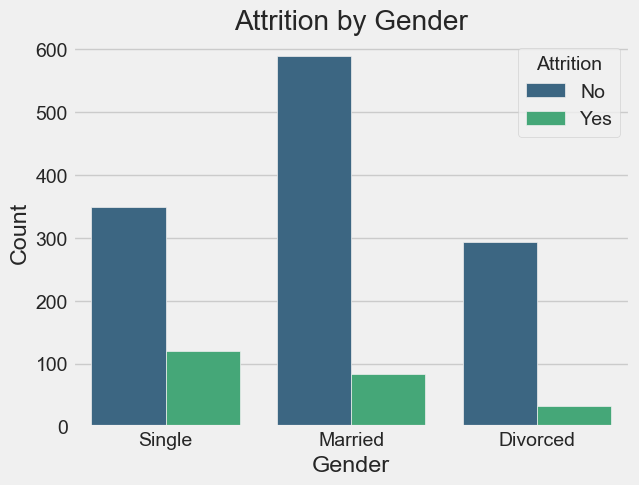

In [42]:
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='viridis')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])



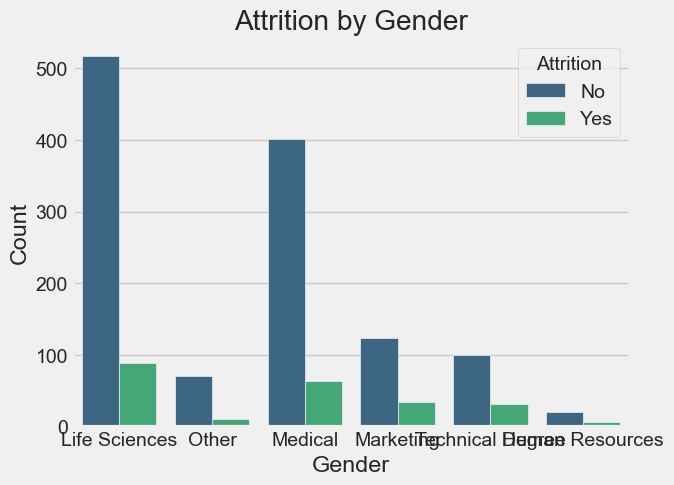

In [43]:
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='viridis')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])



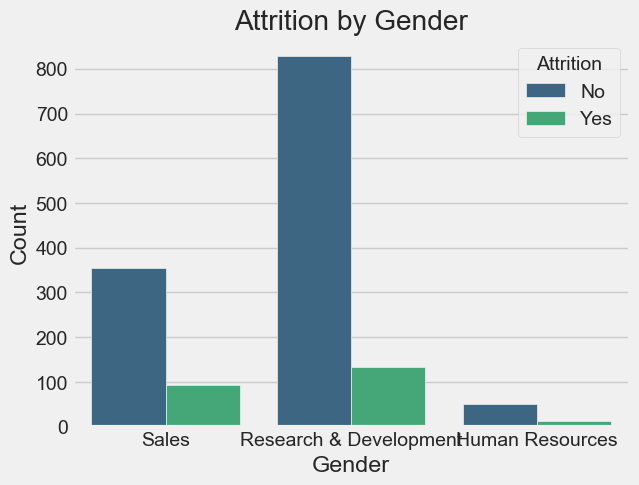

In [44]:
sns.countplot(data=df, x='Department', hue='Attrition', palette='viridis')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

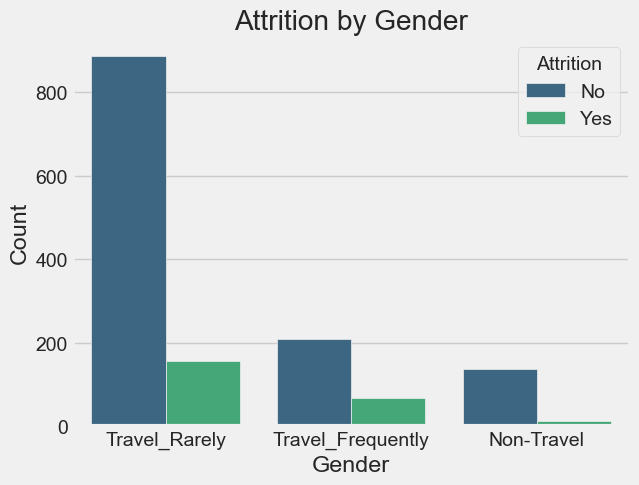

In [45]:
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='viridis')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

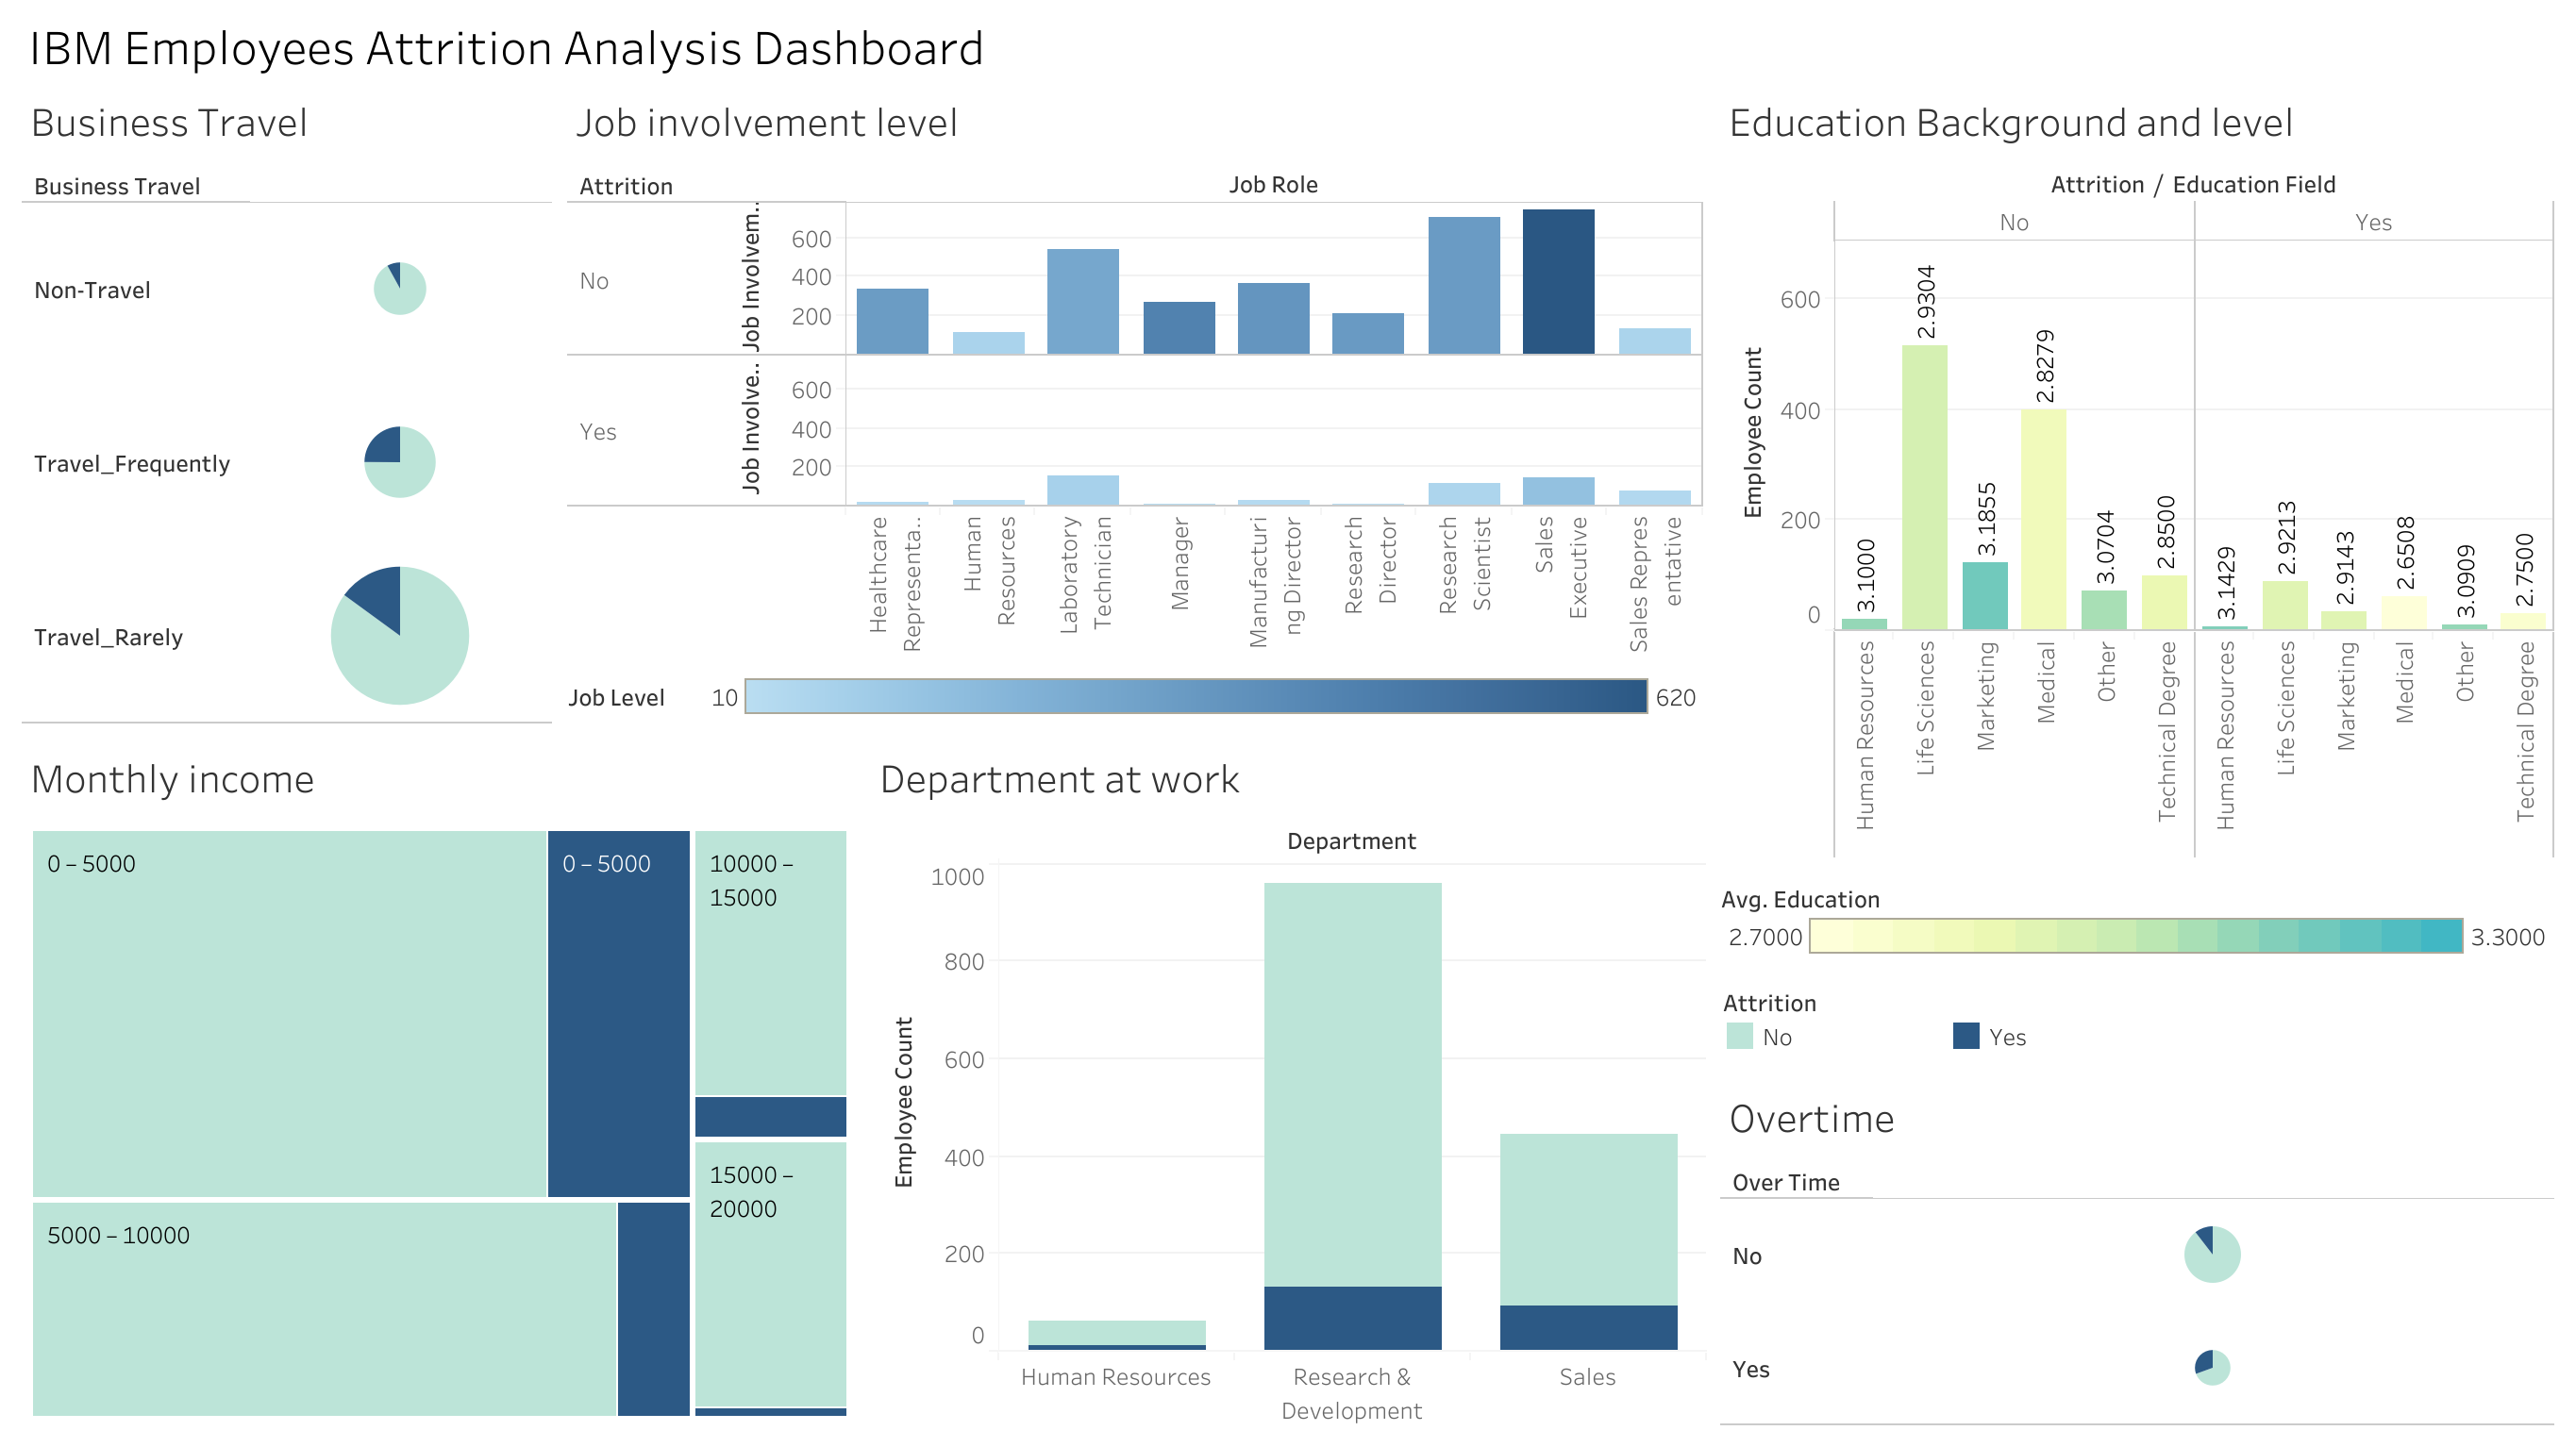

## 📊 Key EDA Insights on Attrition Patterns

After analyzing the relationships between various employee attributes and attrition status, several clear patterns have emerged. These insights can help HR and leadership teams identify at-risk segments and implement targeted retention strategies.

---

### 🎓 Education Level vs Attrition

- Employees with **higher education levels** (postgraduates or equivalent) showed **significantly lower attrition**.
- The **moderately educated** group exhibited the **highest attrition rates**.
- **Business Insight**: Higher education may be correlated with better job fit, engagement, or internal opportunities.

---

### 💼 Job Involvement & Level

- Employees with **high job involvement** are much **less likely to quit**.
- Attrition is **inversely proportional to job level** — senior roles have lower attrition.
- **Business Insight**: Engaged employees and those who feel valued through promotions are more likely to stay.

---

### 📁 Prior Experience

- Employees with **only one prior company** had **higher attrition** than those with none or multiple past employers.
- **Business Insight**: Diverse prior experience may signal adaptability and stronger organizational fit.

---

### 💰 Compensation Factors

- **Monthly income**, **percent salary hike**, and **stock option levels** are all **inversely correlated** with attrition.
- **Business Insight**: Financial incentives are a powerful retention tool.

---

### 📚 Training & Development

- Employees with **2 or 3 training instances** last year showed **higher attrition**.
- **Business Insight**: Training may reflect transition stages; monitor effectiveness and retention post-training.

---

### 🧓 Age & Tenure

- **Employees around age 30** showed the **highest attrition**, possibly due to early-career transitions.
- Those with **0–1 years in the company** had the highest risk; 2–10 years showed similar and lower rates.
- Employees with **0 total experience**, or exactly **9–10 years**, were also more likely to leave.
- **Business Insight**: Focus on early retention strategies and career progression for mid-career talent.

---

### 📘 Education Field

- **Life Sciences** and **Medical** graduates are **less likely to quit**.
- **Marketing** and **Technical Degree** holders are **more prone to attrition**.
- **Business Insight**: Consider industry demand and role satisfaction across education types.

---

### 🏢 Department-wise Retention

- **R&D department** employees have the **lowest attrition rates**.
- **Business Insight**: Roles in R&D may offer better alignment or satisfaction; other departments may require proactive retention policies.

---

### ⏰ Overtime & Work-Life Balance

- Employees working **overtime** are **significantly more likely to quit**.
- Employees who **travel** a lot are **more likely to quit**.
- **Business Insight**: High workloads could lead to burnout. Focus on work-life balance initiatives.

---

### 💍 Marital Status

- **Single employees** show **higher attrition** than **married** or **divorced** counterparts.
- **Business Insight**: Lifestyle flexibility and financial obligations may influence job commitment.

---

## Correlation Matrix ##

<Axes: >

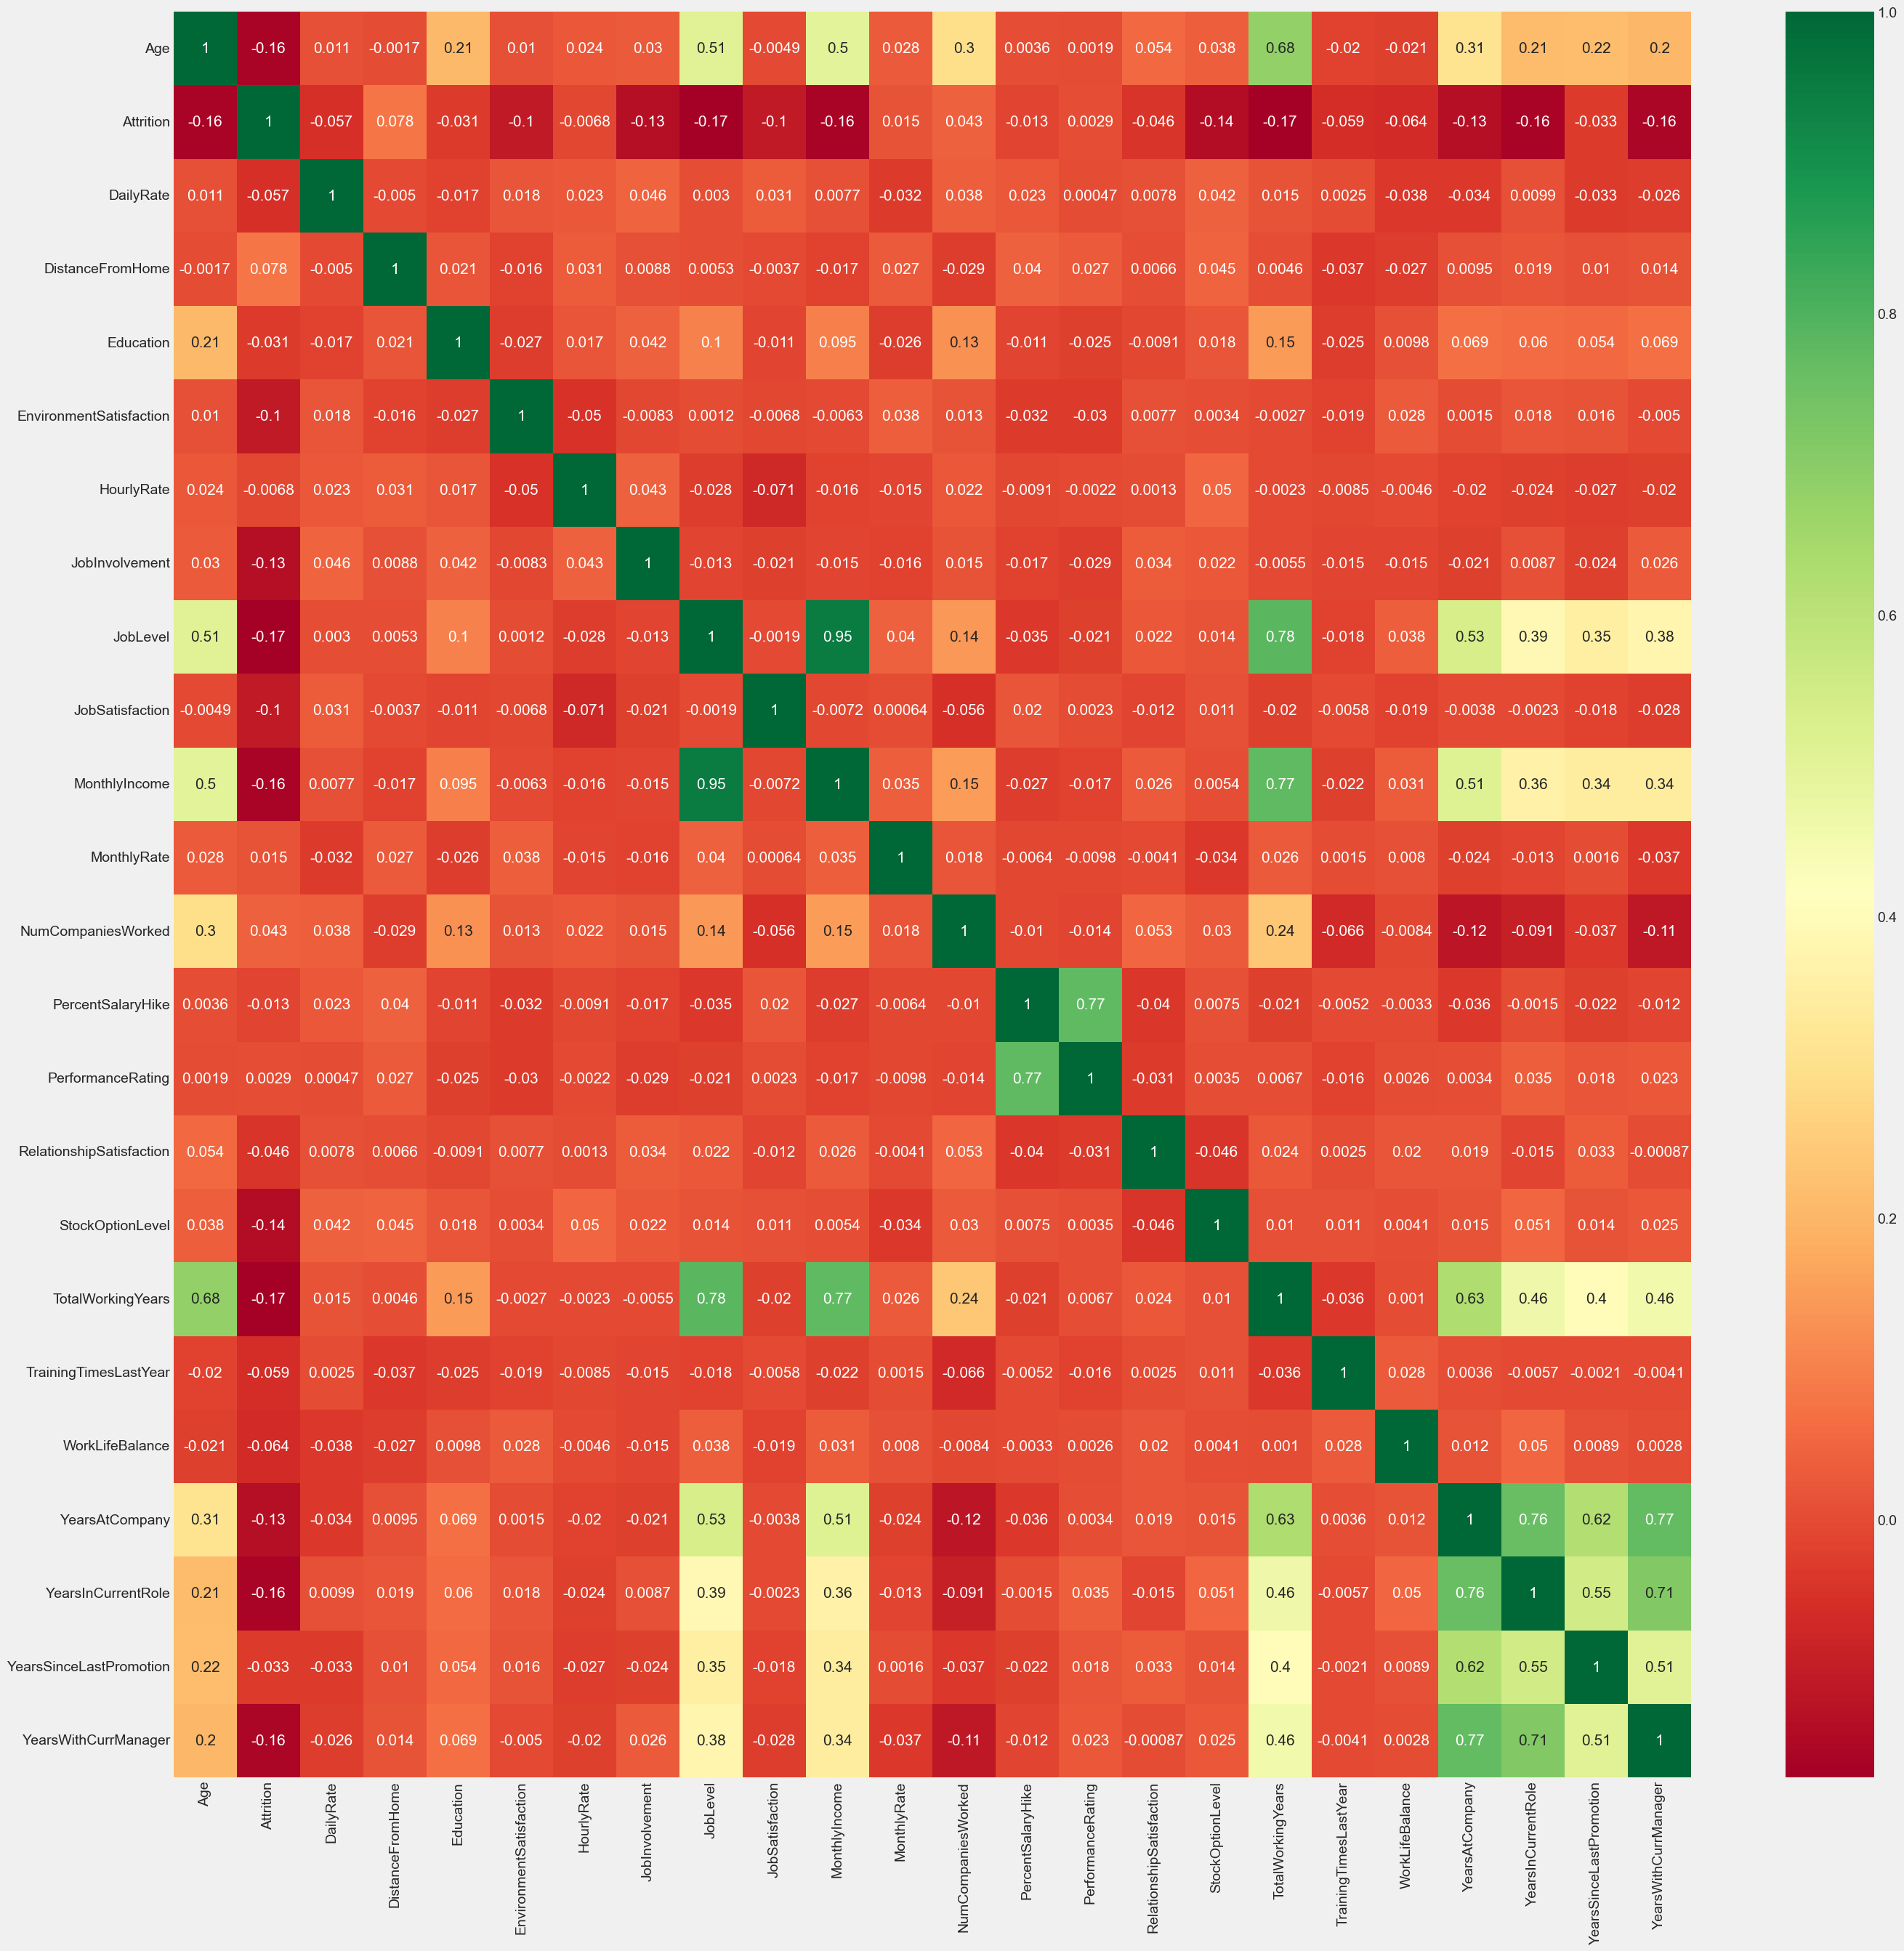

In [47]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(30, 30))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<Axes: >

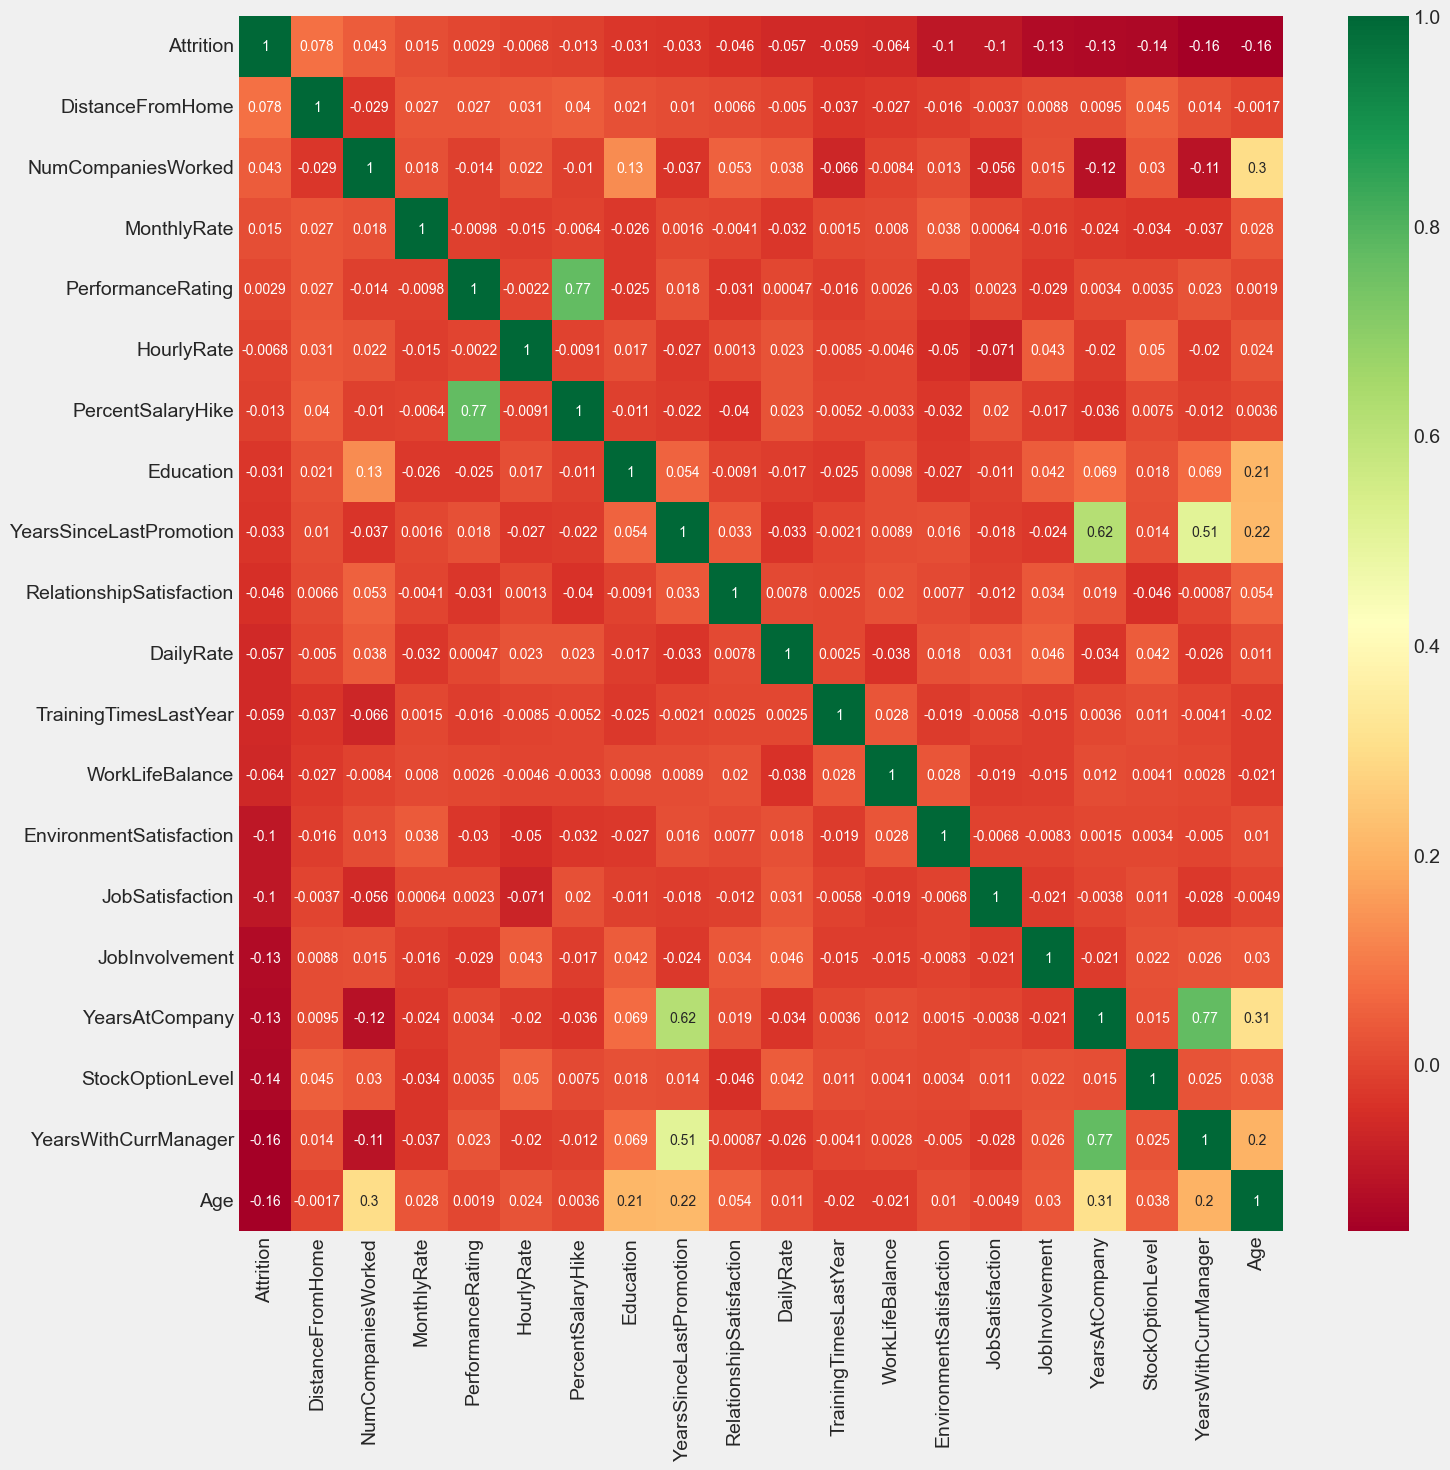

In [49]:
col = numeric_df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [51]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate correlation with Attrition and plot
df_encoded.drop('Attrition', axis=1).corrwith(df_encoded.Attrition).hvplot.barh()

:Bars   [index]   (0)

## 📈 Correlation Insights

A correlation analysis between various employee features reveals several strong relationships that can help us understand the structural and behavioral dynamics within the workforce. These relationships are essential for feature selection, business interpretation, and designing effective retention strategies.

---

### 💼 Monthly Income & Organizational Hierarchy

- **Monthly Income** is **highly correlated** with both **Job Level** and **Total Working Years**.
- This indicates that as employees move up the hierarchy and gain experience, their income increases proportionally.
- **Business Insight**: This is a natural progression but could also lead to dissatisfaction in lower job levels, especially if salary growth is not perceived as fair or motivating.

---

### 📊 Job Level & Experience

- **Job Level** shows a **strong correlation** with **Total Working Years**, reaffirming that seniority is largely experience-driven.
- **Business Insight**: Employees with lower job levels but higher experience might feel stagnant — an important retention risk segment to monitor.

---

### 🕒 Monthly Income & Total Working Years

- There is a strong correlation between **Monthly Income** and **Total Working Years**.
- **Business Insight**: This suggests that compensation is tenure-driven. While expected, companies should ensure merit-based pay doesn’t get overshadowed.

---

### 👵 Age & Total Working Years

- **Age** is **positively correlated** with **Total Working Years**.
- **Business Insight**: Older employees tend to have more experience, naturally affecting their job level and pay. Younger employees with rapid growth may need tailored development plans to retain them.

---

### 💍 Marital Status & Stock Option Level

- A **negative correlation** exists between **Marital Status** and **Stock Option Level**.
- This may imply that **single employees** are either newer, younger, or less likely to receive equity incentives.
- **Business Insight**: Equity distribution might favor certain demographics. Equalizing incentive strategies could improve retention among early-career and single employees.

---

Together, these correlations provide a lens into how structural aspects of the organization—like hierarchy, compensation, and demographics—are interwoven. These will be crucial in both modeling attrition and formulating policy recommendations.

# PHASE 2 - Predictive Modelling using ML algorithms #

## Processing the Data ##

In [52]:
#First, transform the categorical variables into dummy variables
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [53]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [54]:
data.shape

(1470, 136)

<Axes: >

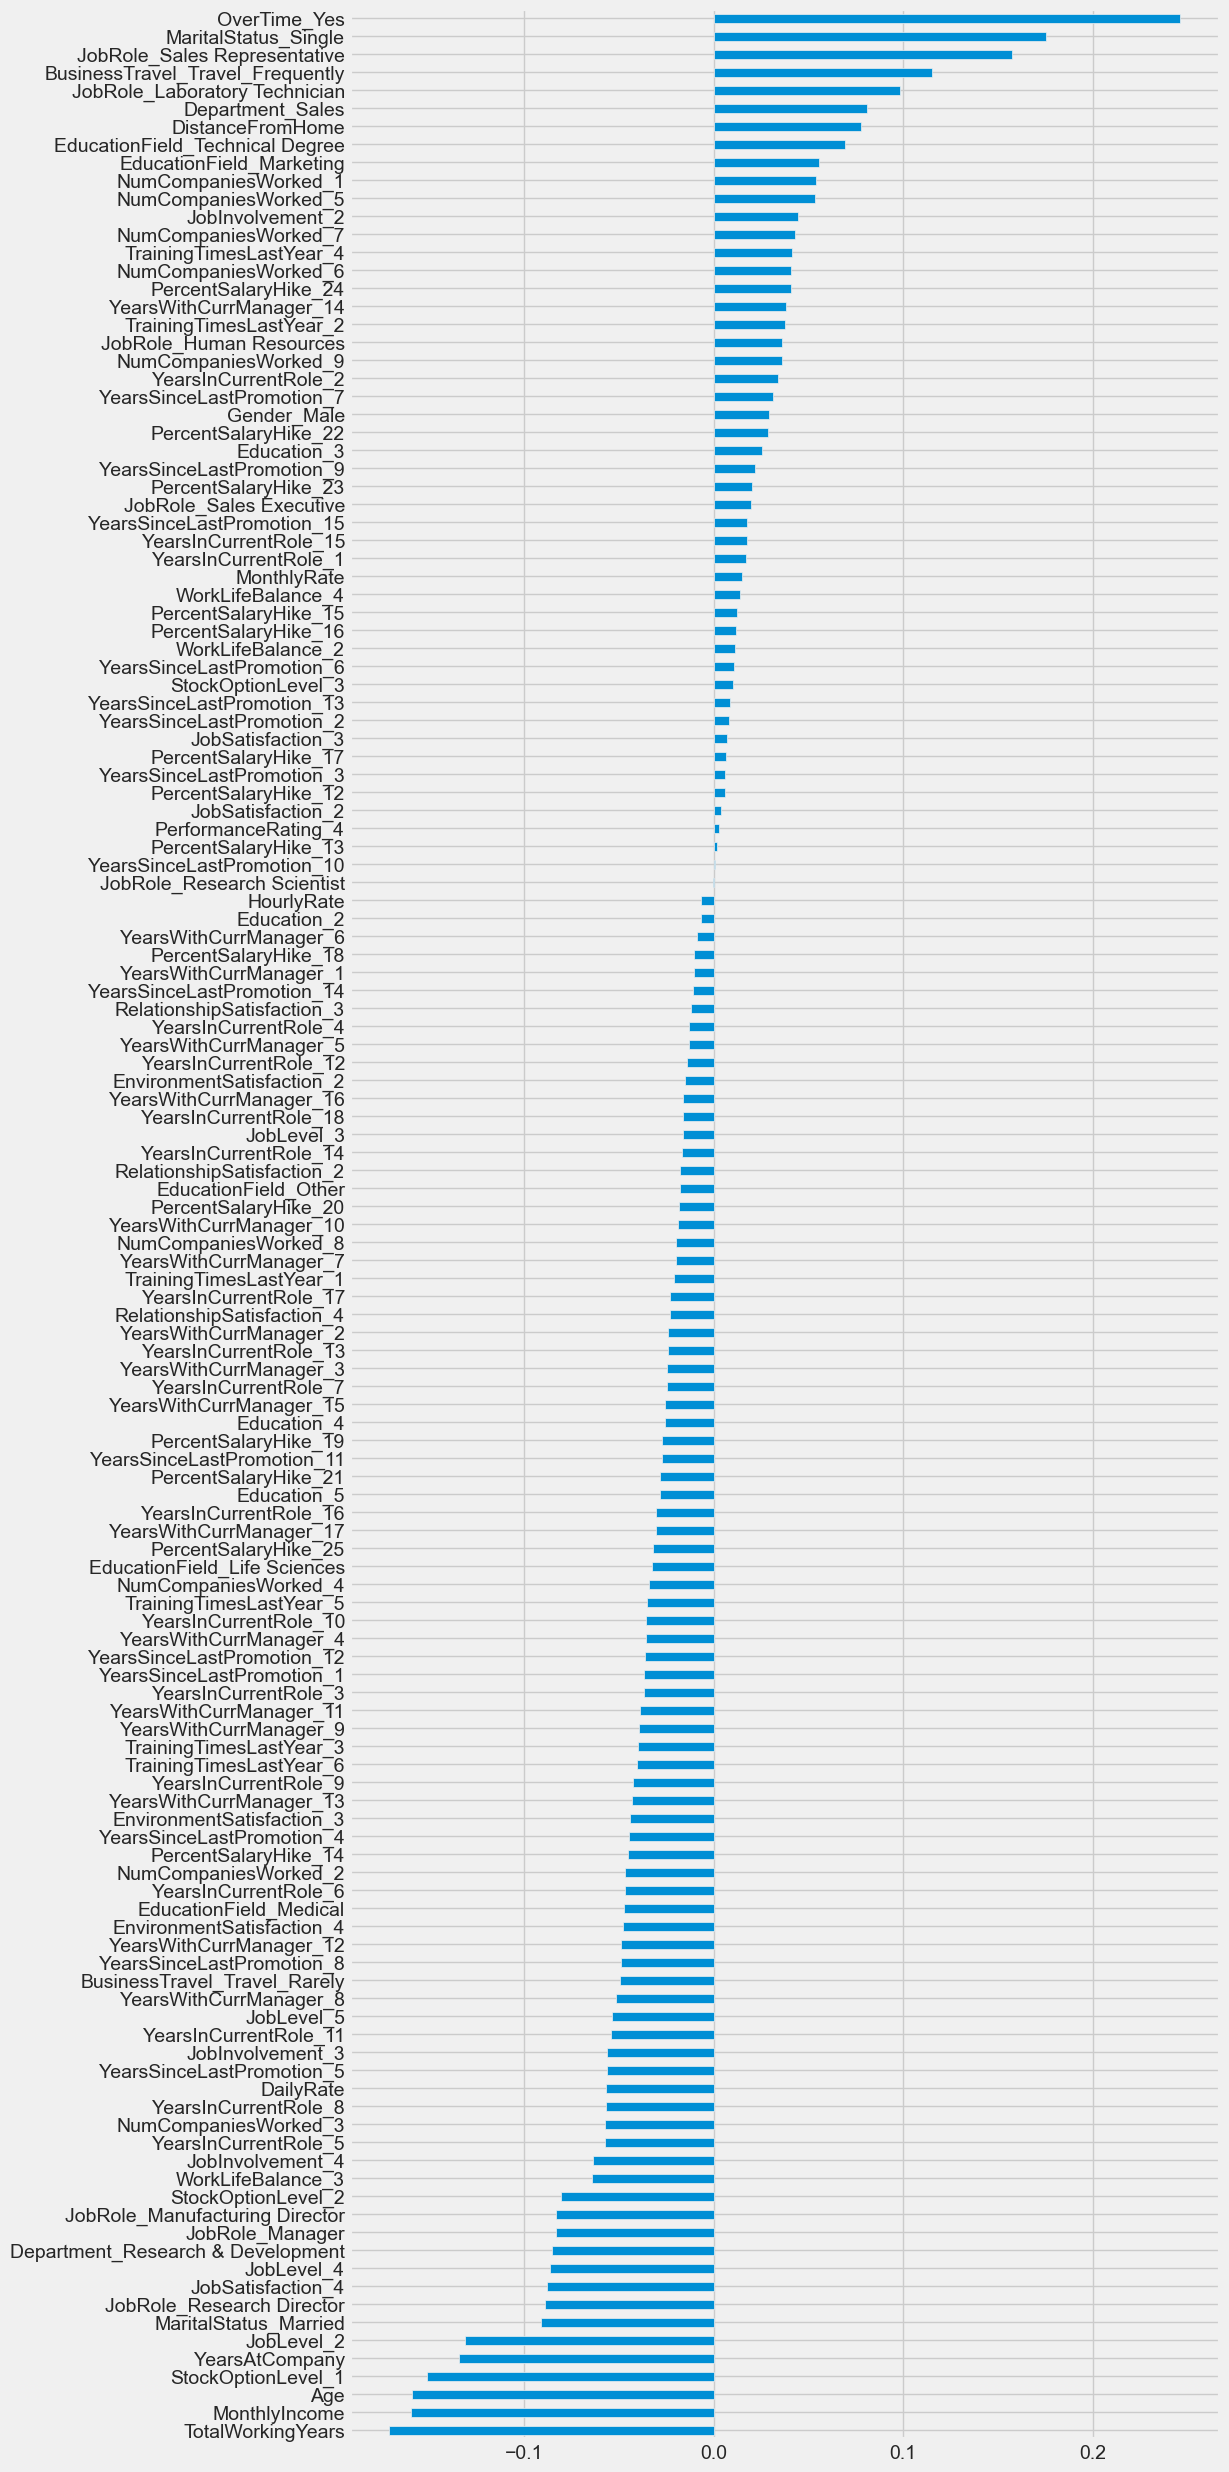

In [55]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [57]:
# Calculate feature correlation with Attrition and filter features with correlation greater than 0.02
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

## ML Prediction ## 


### Template definition ###
This is the standard template that I use for most ML notebooks.

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [59]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

### Logistic Regression ###

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear', penalty='l1')
lr_model.fit(X_train_std, y_train)

evaluate(lr_model, X_train_std, X_test_std, y_train, y_test)





TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.88      0.93       0.91          0.93
recall      0.98   0.64      0.93       0.81          0.93
f1-score    0.96   0.75      0.93       0.85          0.92
support   863.00 166.00      0.93    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.56      0.85       0.73          0.84
recall      0.94  0.39      0.85       0.67          0.85
f1-score    0.91  0.46      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


In [68]:
#Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_std, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_model = grid_search.best_estimator_
evaluate(best_model, X_train_std, X_test_std, y_train, y_test)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[852  11]
 [ 67  99]]
ACCURACY SCORE:
0.9242
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.90      0.92       0.91          0.92
recall      0.99   0.60      0.92       0.79          0.92
f1-score    0.96   0.72      0.92       0.84          0.92
support   863.00 166.00      0.92    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[355  15]
 [ 45  26]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.63      0.86       0.76          0.85
recall      0.96  0.37      0.86       0.66          0.86
f1-score    0.92  0.46      0.86       0.69          0.85
support   370.00 71.00      0.86     441.00        441.00


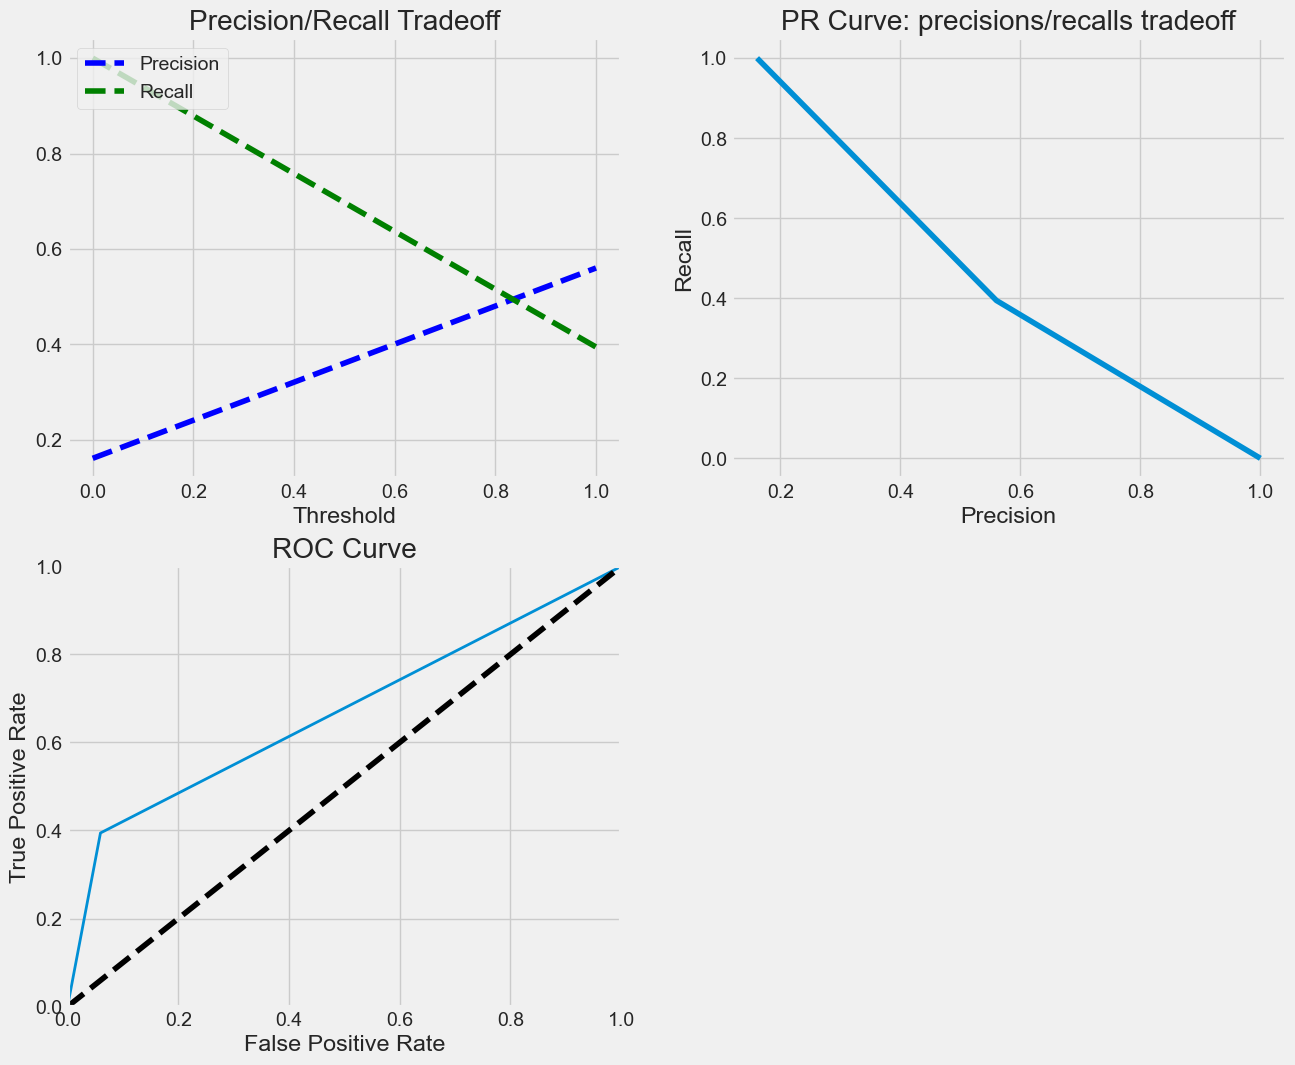

In [70]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_model.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict(X_test_std))
plot_roc_curve(fpr, tpr)

### Random Forest Classifier ###

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 61  10]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.50      0.84       0.68          0.80
recall      0.97  0.14      0.84       0.56          0.84
f1-score    0.91  0.22      0.84       0.57          0.80
support   370.00 71.00      0.84     441.00        441.00


In [75]:
# Hyperparameter tuning for Random Forest Classifier
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1447 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/maruthi/venv/.venv/lib/python3.13/site-package

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 14 152]]
ACCURACY SCORE:
0.9864
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.92      0.99       0.96          0.99
f1-score    0.99   0.96      0.99       0.97          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[359  11]
 [ 63   8]]
ACCURACY SCORE:
0.8322
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.42      0.83       0.64          0.78
recall      0.97  0.11      0.83       0.54          0.83
f1-score    0.91  0.18      0.83       0.54          0.79
support   370.00 71.00      0.83     441.00        441.00


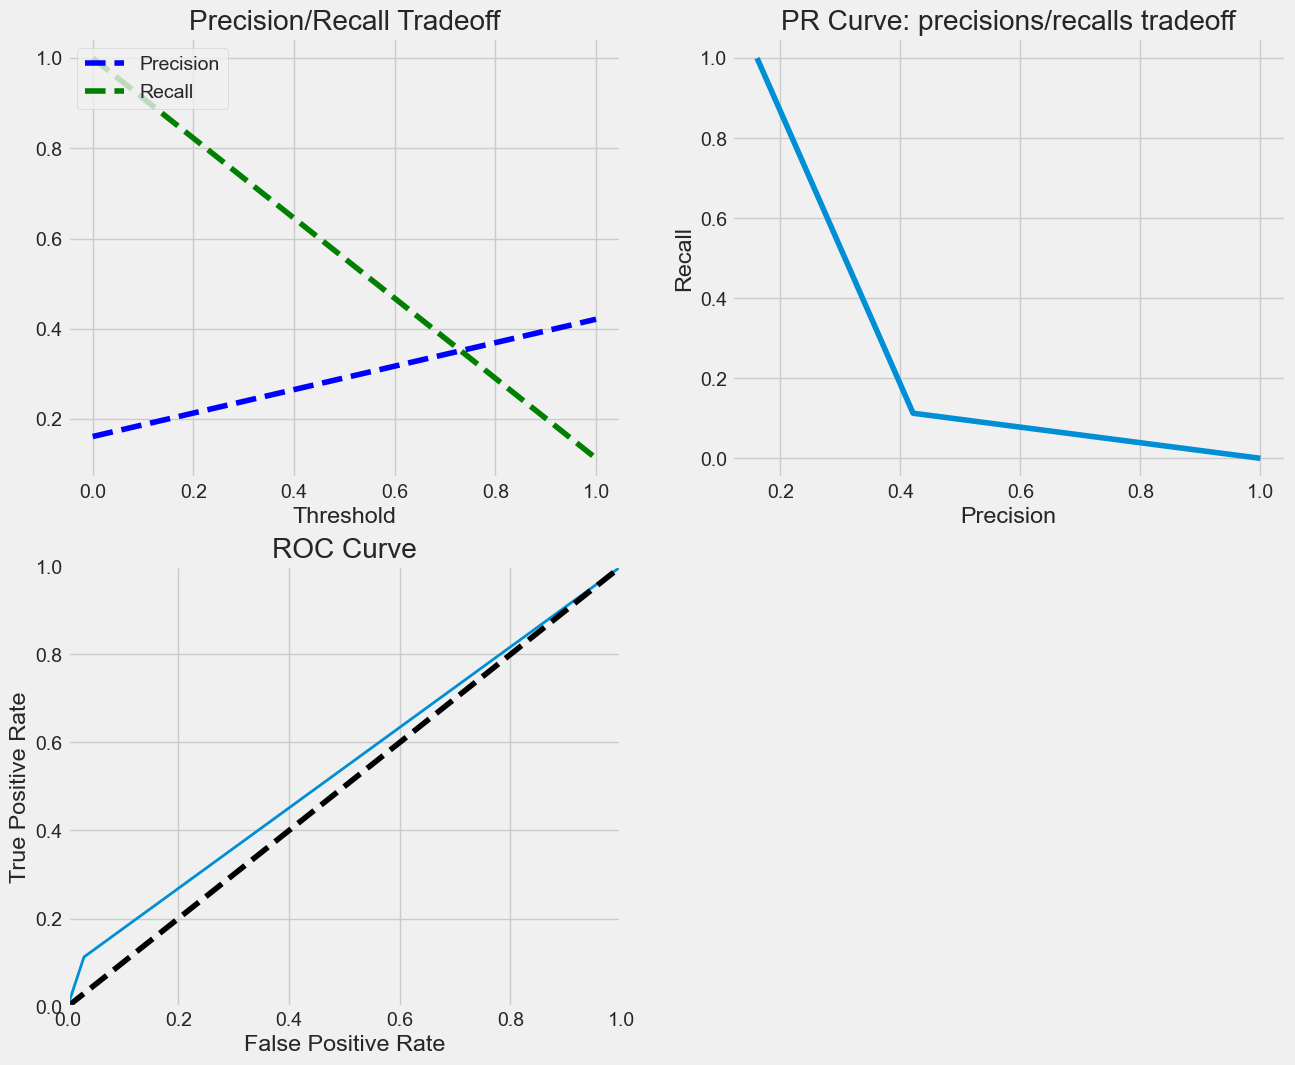

In [76]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

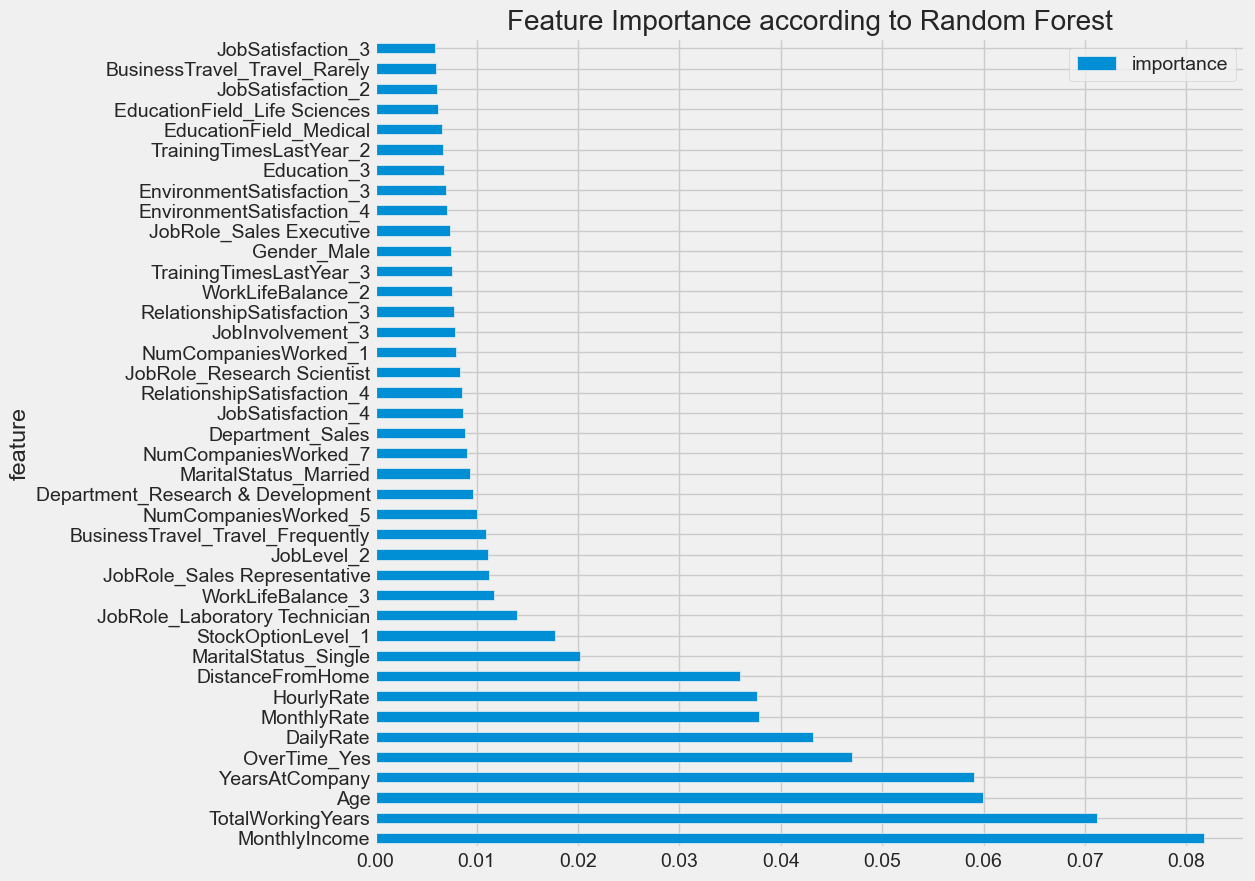

In [77]:
# Plot feature importance
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

### SVM Classifier ###

In [78]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 47 119]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.94      0.95       0.94          0.95
recall      0.99   0.72      0.95       0.85          0.95
f1-score    0.97   0.81      0.95       0.89          0.94
support   863.00 166.00      0.95    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.52      0.84       0.70          0.83
recall      0.93  0.38      0.84       0.66          0.84
f1-score    0.91  0.44      0.84       0.67          0.83
support   370.00 71.00      0.84     441.00        441.00


In [79]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [80]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.99   0.99      0.99       0.99          0.99
recall      1.00   0.96      0.99       0.98          0.99
f1-score    1.00   0.98      0.99       0.99          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.55      0.85       0.72          0.84
recall      0.94  0.41      0.85       0.67          0.85
f1-score    0.91  0.47      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


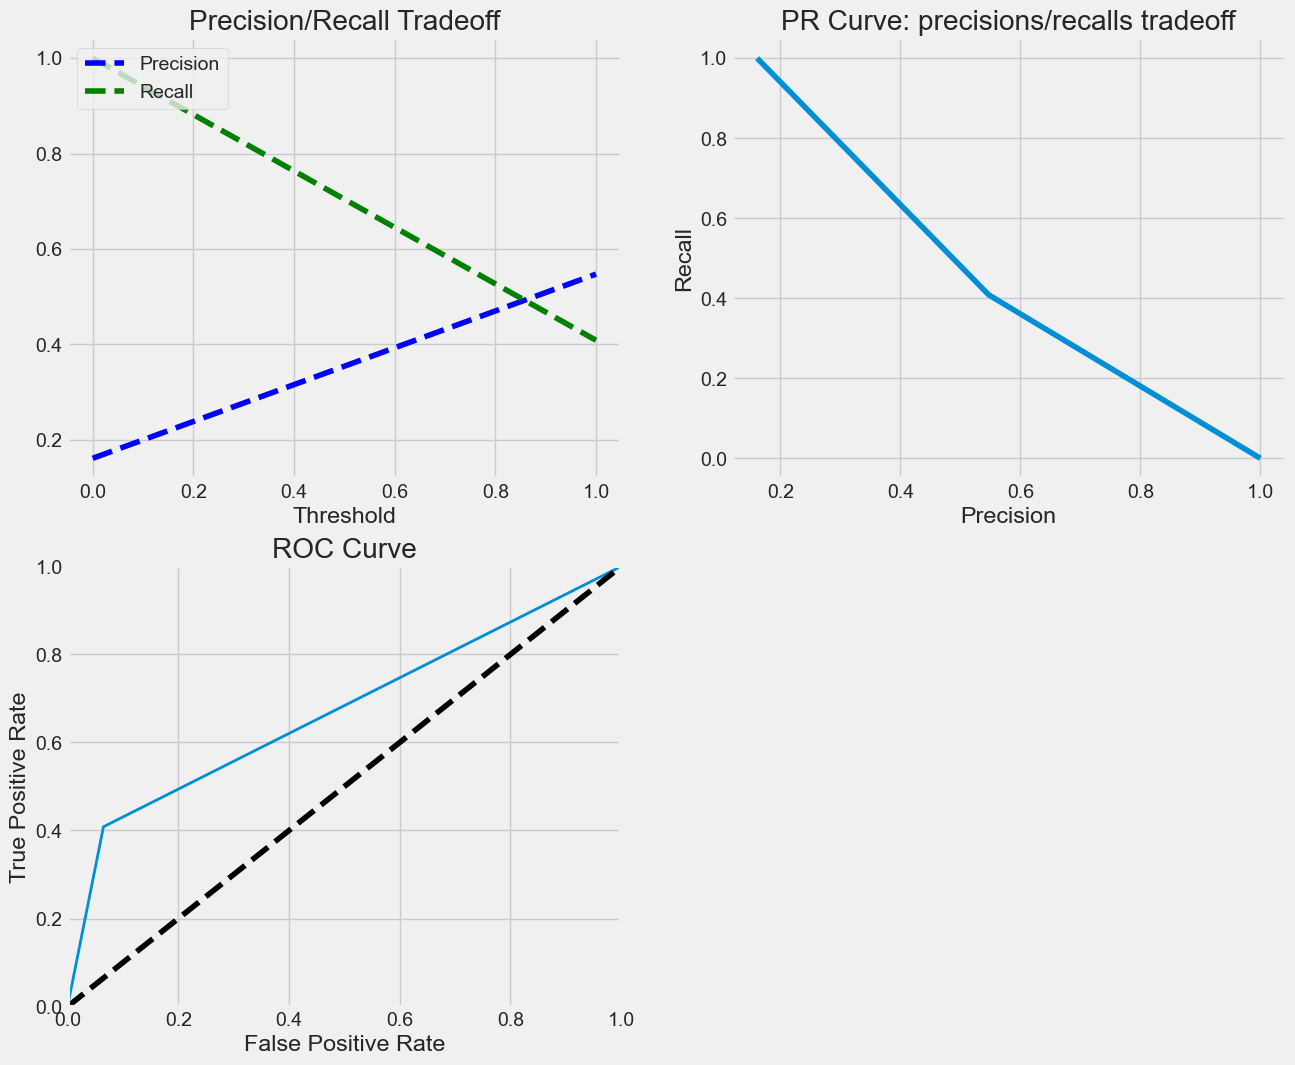

In [81]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

### XGBoost Classifier ###

In [82]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[358  12]
 [ 48  23]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.88  0.66      0.86       0.77          0.85
recall      0.97  0.32      0.86       0.65          0.86
f1-score    0.92  0.43      0.86       0.68          0.84
support   370.00 71.00      0.86     441.00        441.00


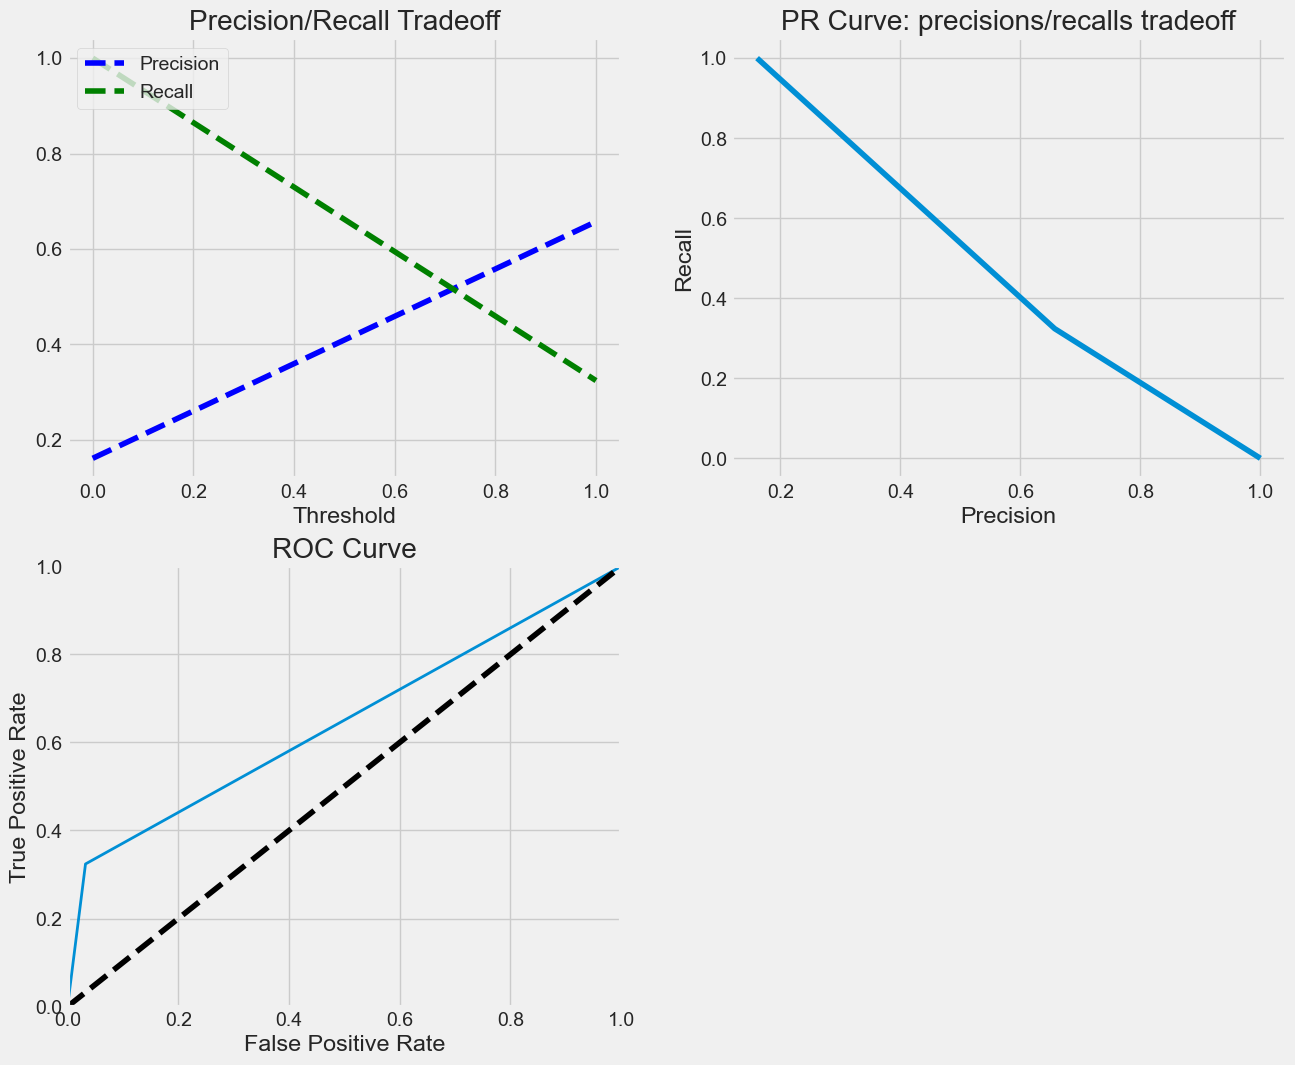

In [83]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

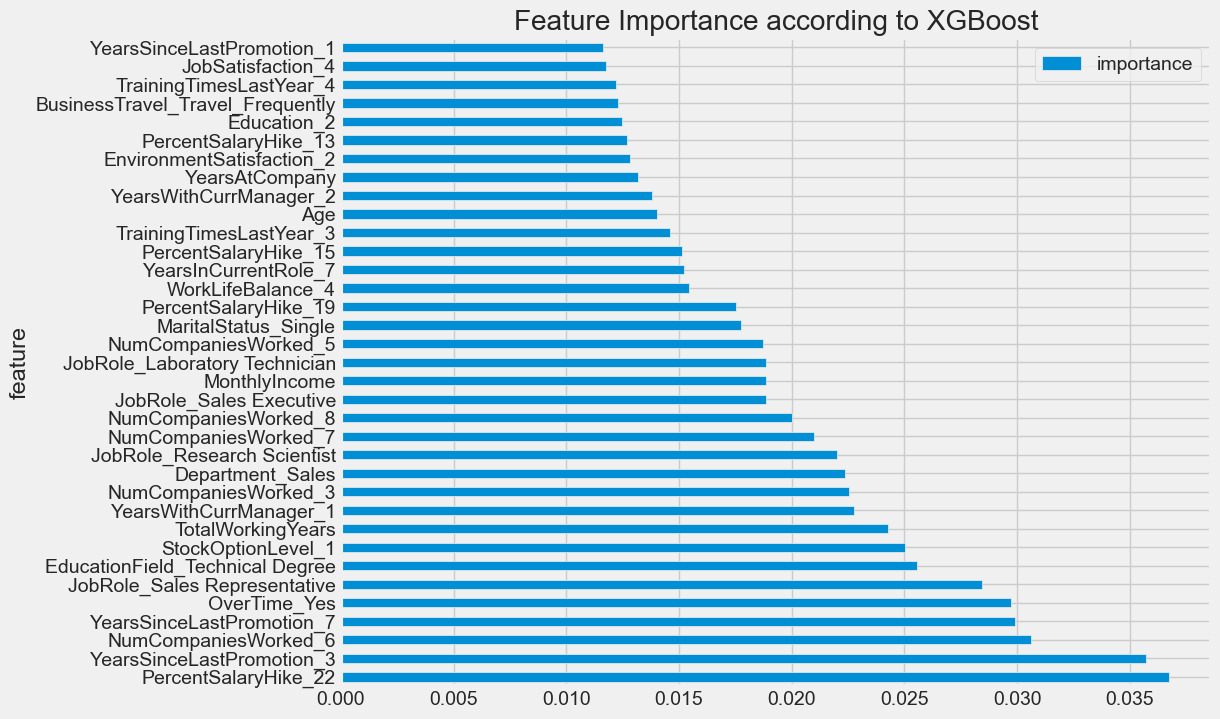

In [84]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

### LightGBM Classifier ###

In [85]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00  

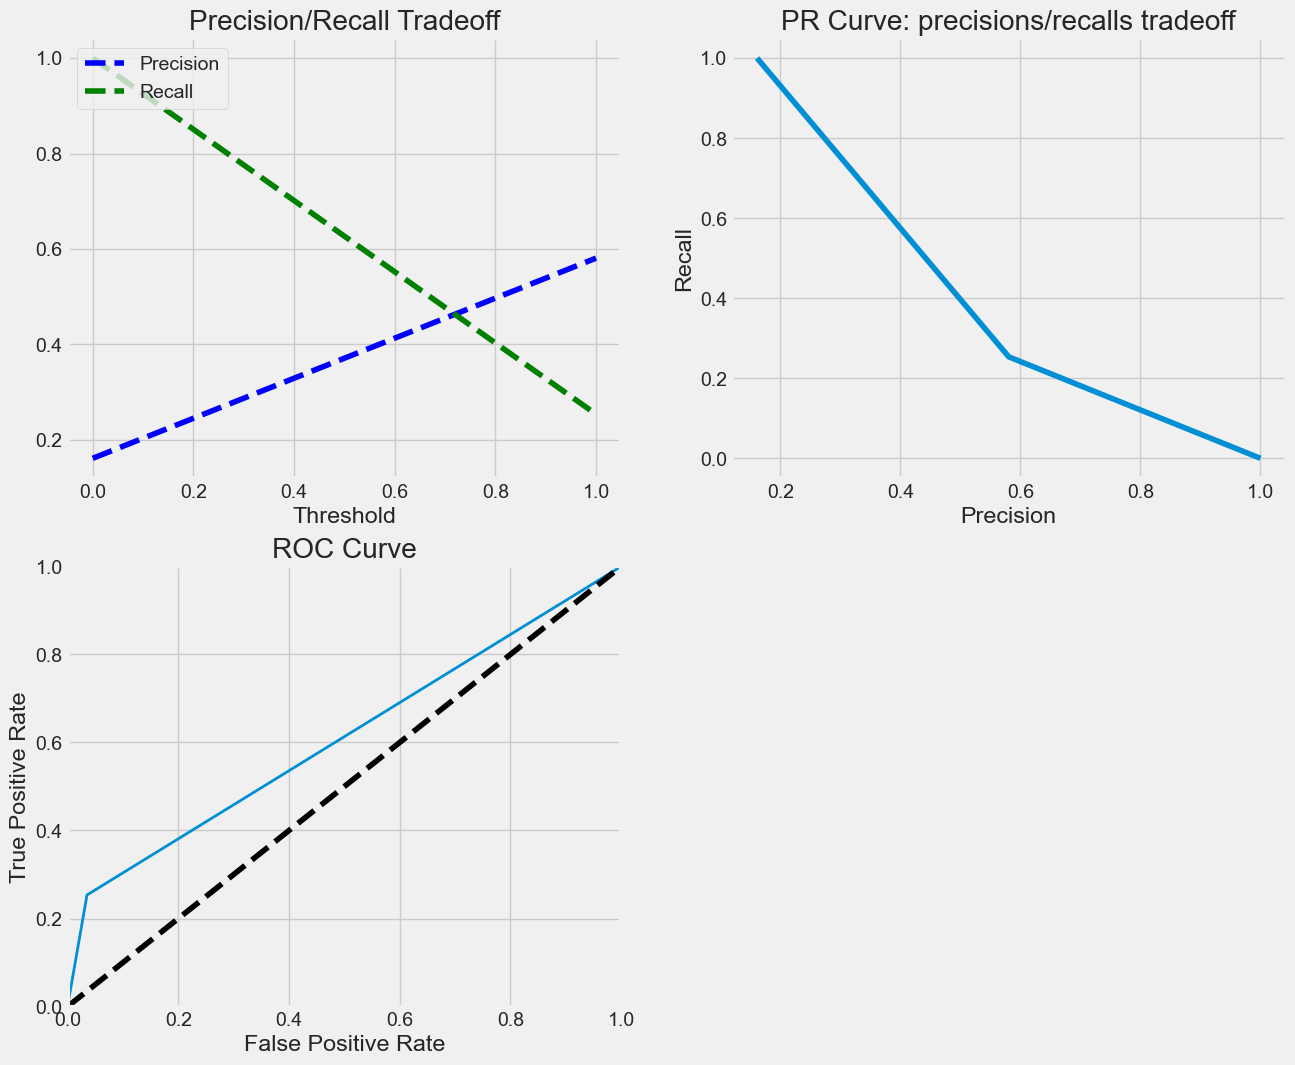

In [86]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

### CatBoost Classifier ###

In [87]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.98       0.99          0.98
recall      1.00   0.90      0.98       0.95          0.98
f1-score    0.99   0.95      0.98       0.97          0.98
support   863.00 166.00      0.98    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 57  14]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.61      0.85       0.74          0.82
recall      0.98  0.20      0.85       0.59          0.85
f1-score    0.92  0.30      0.85       0.61          0.82
support   370.00 71.00      0.85     441.00        441.00


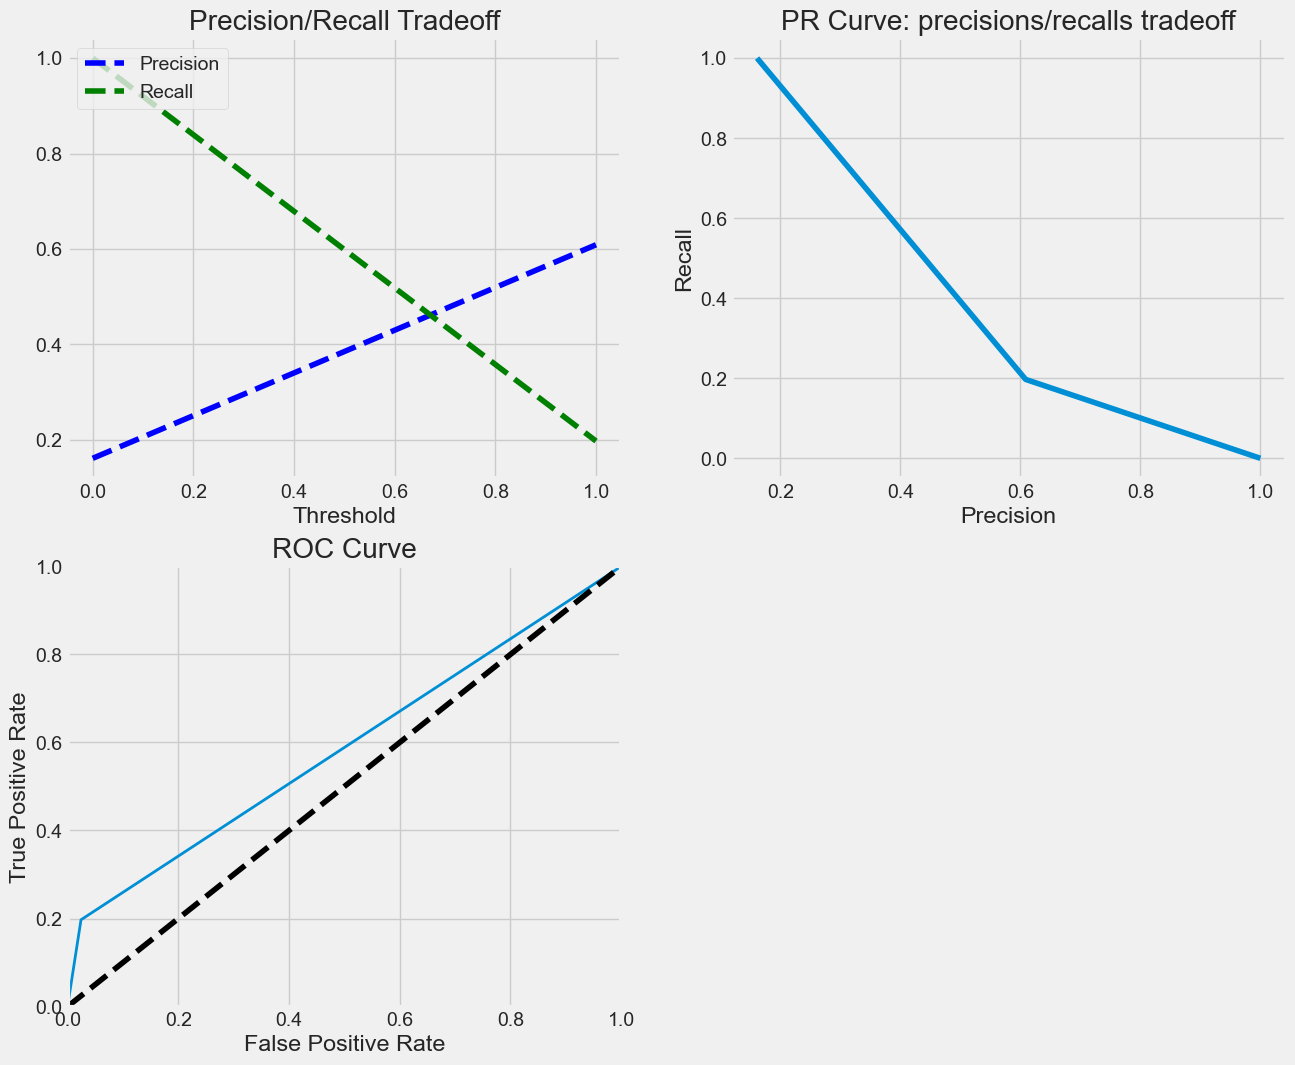

In [88]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

### AdaBoost CLassfier ###

In [89]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [105  61]]
ACCURACY SCORE:
0.8902
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.88      0.89       0.89          0.89
recall      0.99   0.37      0.89       0.68          0.89
f1-score    0.94   0.52      0.89       0.73          0.87
support   863.00 166.00      0.89    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 56  15]]
ACCURACY SCORE:
0.8277
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.43      0.83       0.65          0.79
recall      0.95  0.21      0.83       0.58          0.83
f1-score    0.90  0.28      0.83       0.59          0.80
support   370.00 71.00      0.83     441.00        441.00


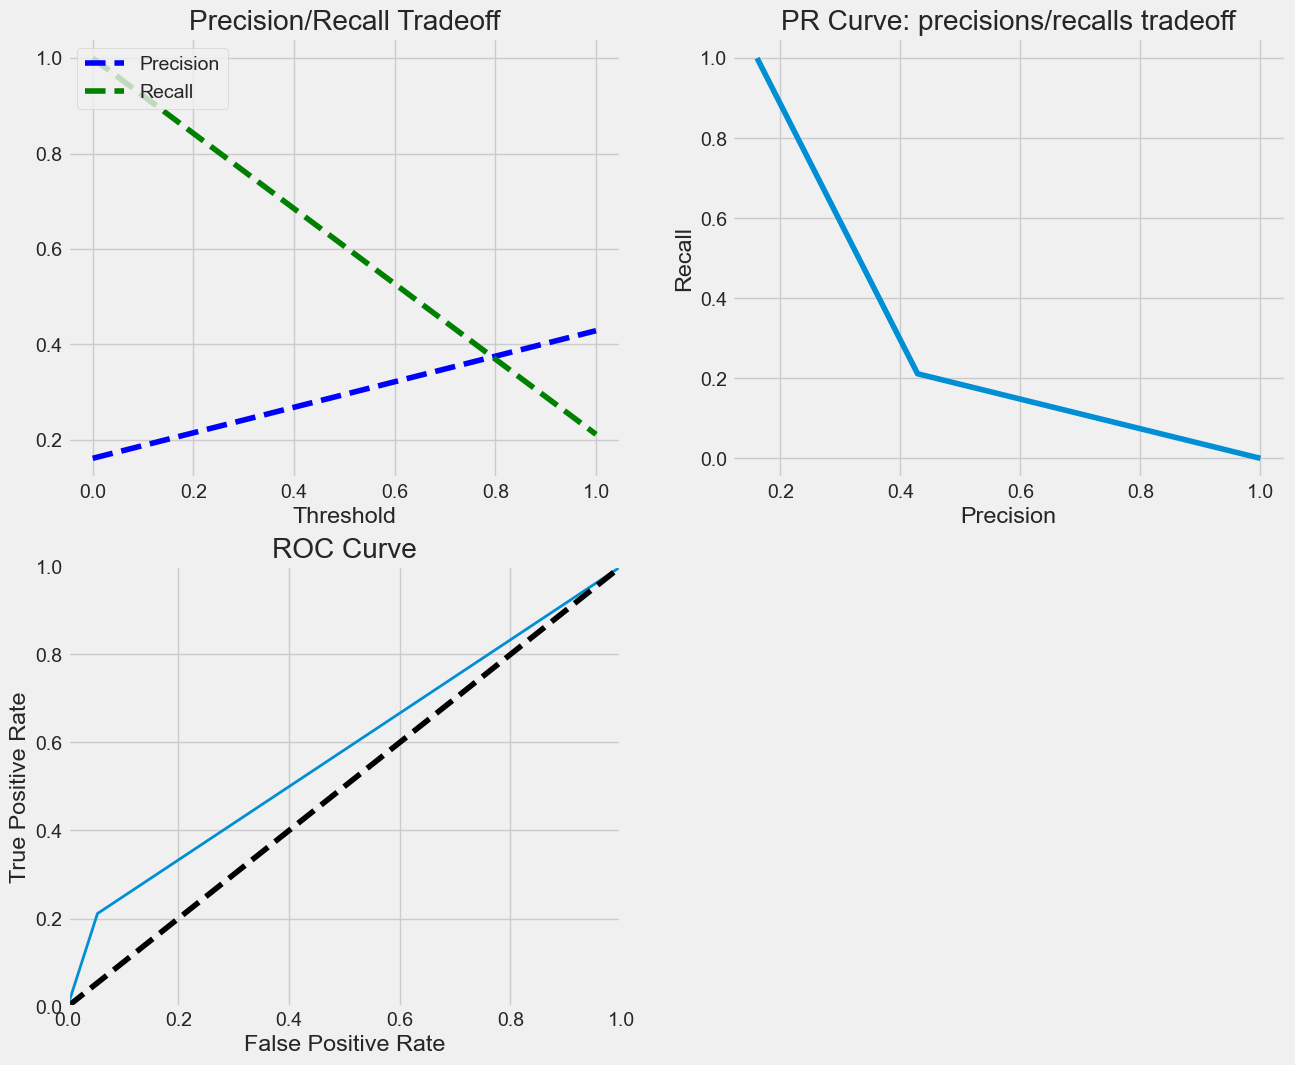

In [90]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [93]:
#Compare all modlinkcode
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_model,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")


RANDOM FOREST                  roc_auc_score: 0.541
XGBOOST                        roc_auc_score: 0.646
LOGISTIC REGRESSION            roc_auc_score: 0.546
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
LIGHTGBM                       roc_auc_score: 0.609
CATBOOST                       roc_auc_score: 0.586
ADABOOST                       roc_auc_score: 0.579


/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [96]:
# Select the best model based on roc_auc_score
best_model = max(ml_models, key=lambda x: roc_auc_score(y_test, ml_models[x].predict(X_test)))
print(f"The best model is: {best_model} with roc_auc_score: {roc_auc_score(y_test, ml_models[best_model].predict(X_test)):.3f}")

The best model is: XGBoost with roc_auc_score: 0.646


/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/maruthi/venv/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [98]:
feature_importances = pd.DataFrame()
for model_name, model in ml_models.items():
    if hasattr(model, 'feature_importances_'):
        fi = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
    elif hasattr(model, 'coef_') and len(model.coef_.shape) > 1:  # Ensure coef_ exists and is valid
        fi = pd.DataFrame({'feature': X.columns, 'importance': model.coef_[0]})
    else:
        print(f"Skipping model {model_name} as it does not support feature importances or coefficients.")
        continue
    fi['model'] = model_name
    feature_importances = pd.concat([feature_importances, fi], axis=0)
top_features = feature_importances.groupby('feature').agg({'importance': 'sum'}).reset_index()
top_features = top_features.sort_values(by='importance', ascending=False).head(5)
print("Top 5 cumulative features across all models:")
print(top_features)


Skipping model Support Vector Machine as it does not support feature importances or coefficients.
Top 5 cumulative features across all models:
          feature  importance
41  MonthlyIncome      310.45
3       DailyRate      249.69
42    MonthlyRate      237.32
0             Age      228.12
20     HourlyRate      212.79


## 🧠 Addressing Key Business Questions

---

### 1. **What factors contribute most significantly to employee attrition?**

From both correlation analysis and EDA:

- **Lower job level**, **lower monthly income**, and **fewer years at the company** are strong indicators of higher attrition.
- Employees with **low job involvement**, **no stock options**, or **little to no salary hikes** are significantly more likely to leave.
- **Overtime workload**, **single marital status**, and **early career stage (age ~30)** also correspond to higher attrition.

> **Insight**: Compensation, recognition, engagement, and work-life balance are key levers in retention.

---

### 2. **Are certain departments or job roles more prone to attrition than others?**

Yes. Department-wise trends reveal:

- **R&D** has the **lowest attrition**, possibly due to more meaningful or fulfilling roles.
- Employees from **Marketing** and **Sales-related roles**, especially those with **Technical or Business education**, show **higher attrition**.

> **Insight**: Roles with high external demand or high pressure may need tailored retention strategies.

---

### 3. **What demographic or behavioral patterns can we observe among employees who leave?**

Common traits among employees with higher attrition include:

- **Younger age** (around 30), and **lower experience**
- **Single marital status**
- **More overtime hours**
- **Moderate training frequency (2–3 times/year)** — possibly indicating preparation for external opportunities
- **Low tenure at the company** (0–1 years) and **total career duration of 0, 9, or 10 years**

> **Insight**: Attrition is not random—it follows clear demographic and behavioral signals that HR can monitor.

---

### 4. **What actionable measures can the company take to retain employees?**

Based on the data:

- Increase **early-career engagement** through mentorship and development paths.
- Offer **competitive salary hikes** and **stock incentives**, especially for high-potential or at-risk groups.
- Rebalance **workloads and overtime** across teams.
- Create **targeted retention programs** for marketing and sales roles.
- Monitor new hires closely in their first 1–2 years and implement **personalized onboarding journeys**.

---

### 5. **What is the potential business value of an attrition prediction model?**

A predictive model allows:

- **Proactive identification** of at-risk employees
- **Cost savings** from reduced rehiring and training needs
- **Faster intervention**, improving morale and productivity
- **Strategic HR planning** with data-backed insights

> **Value**: Even small reductions in attrition can save substantial amounts annually in hidden turnover costs.

---

### 6. **Can predictive insights reduce the financial and productivity costs associated with attrition?**

Absolutely. With accurate prediction:

- The company can **prioritize interventions** where the impact is highest.
- Resources can be allocated to **retain critical roles** or high-performers.
- Attrition-related disruptions in **projects and teams** can be minimized.

> **Example**: Predicting a 20% risk for a key technical employee allows preemptive engagement, potentially saving months of hiring/training costs.

---

### 7. **How can visualization and dashboards assist HR and leadership in monitoring attrition trends?**

Interactive dashboards (e.g., in **Tableau**) empower decision-makers by:

- Highlighting **real-time trends** in attrition by department, age group, or education level
- Displaying **risk profiles** across employee segments
- Enabling **filterable insights** (e.g., attrition by job level or marital status)
- Supporting **what-if analysis** and scenario planning

> **Impact**: Dashboards convert complex attrition data into accessible, actionable insight for all HR stakeholders.

---